# Exploring Loan Data From Prosper Dataset
## by Hussien sayed

## Preliminary Wrangling

This dataset contain information about loans (81 features). As there is too many features we'll only explore and use only some of these features like Loan amount,the number of investors,loan status and term duration.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('prosperLoanData.csv')

In [3]:
df.shape

(113937, 81)

In [4]:
print(df.columns.values)

['ListingKey' 'ListingNumber' 'ListingCreationDate' 'CreditGrade' 'Term'
 'LoanStatus' 'ClosedDate' 'BorrowerAPR' 'BorrowerRate' 'LenderYield'
 'EstimatedEffectiveYield' 'EstimatedLoss' 'EstimatedReturn'
 'ProsperRating (numeric)' 'ProsperRating (Alpha)' 'ProsperScore'
 'ListingCategory (numeric)' 'BorrowerState' 'Occupation'
 'EmploymentStatus' 'EmploymentStatusDuration' 'IsBorrowerHomeowner'
 'CurrentlyInGroup' 'GroupKey' 'DateCreditPulled' 'CreditScoreRangeLower'
 'CreditScoreRangeUpper' 'FirstRecordedCreditLine' 'CurrentCreditLines'
 'OpenCreditLines' 'TotalCreditLinespast7years' 'OpenRevolvingAccounts'
 'OpenRevolvingMonthlyPayment' 'InquiriesLast6Months' 'TotalInquiries'
 'CurrentDelinquencies' 'AmountDelinquent' 'DelinquenciesLast7Years'
 'PublicRecordsLast10Years' 'PublicRecordsLast12Months'
 'RevolvingCreditBalance' 'BankcardUtilization' 'AvailableBankcardCredit'
 'TotalTrades' 'TradesNeverDelinquent (percentage)'
 'TradesOpenedLast6Months' 'DebtToIncomeRatio' 'IncomeRange'
 '

In [5]:
cols_of_interset = ["Term","LoanStatus","BorrowerAPR","EstimatedReturn","ProsperRating (numeric)","IncomeRange","StatedMonthlyIncome","LoanOriginalAmount","Investors"]

In [6]:
df2 = df[cols_of_interset]

In [7]:
df2.head()

,Term,LoanStatus,BorrowerAPR,EstimatedReturn,ProsperRating (numeric),IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,Investors
0,36,Completed,0.16516,NaN,NaN,"$25,000-49,999",3083.333333,9425,258
1,36,Current,0.12016,0.05470,6.0,"$50,000-74,999",6125.000000,10000,1
2,36,Completed,0.28269,NaN,NaN,Not displayed,2083.333333,3001,41
3,36,Current,0.12528,0.06000,6.0,"$25,000-49,999",2875.000000,10000,158
4,36,Current,0.24614,0.09066,3.0,"$100,000+",9583.333333,15000,20


In [8]:
df2.describe()

,Term,BorrowerAPR,EstimatedReturn,ProsperRating (numeric),StatedMonthlyIncome,LoanOriginalAmount,Investors
count,113937.000000,113912.000000,84853.000000,84853.000000,1.139370e+05,113937.00000,113937.000000
mean,40.830248,0.218828,0.096068,4.072243,5.608026e+03,8337.01385,80.475228
std,10.436212,0.080364,0.030403,1.673227,7.478497e+03,6245.80058,103.239020
min,12.000000,0.006530,-0.182700,1.000000,0.000000e+00,1000.00000,1.000000
25%,36.000000,0.156290,0.074080,3.000000,3.200333e+03,4000.00000,2.000000
50%,36.000000,0.209760,0.091700,4.000000,4.666667e+03,6500.00000,44.000000
75%,36.000000,0.283810,0.116600,5.000000,6.825000e+03,12000.00000,115.000000
max,60.000000,0.512290,0.283700,7.000000,1.750003e+06,35000.00000,1189.000000


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Term                     113937 non-null  int64  
 1   LoanStatus               113937 non-null  object 
 2   BorrowerAPR              113912 non-null  float64
 3   EstimatedReturn          84853 non-null   float64
 4   ProsperRating (numeric)  84853 non-null   float64
 5   IncomeRange              113937 non-null  object 
 6   StatedMonthlyIncome      113937 non-null  float64
 7   LoanOriginalAmount       113937 non-null  int64  
 8   Investors                113937 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 7.8+ MB


### What is the structure of your dataset?

This dataset contains 113937 of 81 features. These features describe loan,Borrower,lender and investors proberties.


### What is/are the main feature(s) of interest in your dataset?

The main features of interest are the loan amount,income range and number of investors.
the equivalent column names are : (LoanOriginalAmount,IncomeRange,Investors)


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The features that might help us during the investigation are the Term duration,Loan status,borrower's annual percentage rate,estimated return,Prosper ratingand monthly income 
the equivalent column names are : (Term,LoanStatus,BorrowerAPR,EstimatedReturn,ProsperRating (numeric),StatedMonthlyIncome)

## Univariate Exploration

First, let's have a look at the distribution of the loan amount.

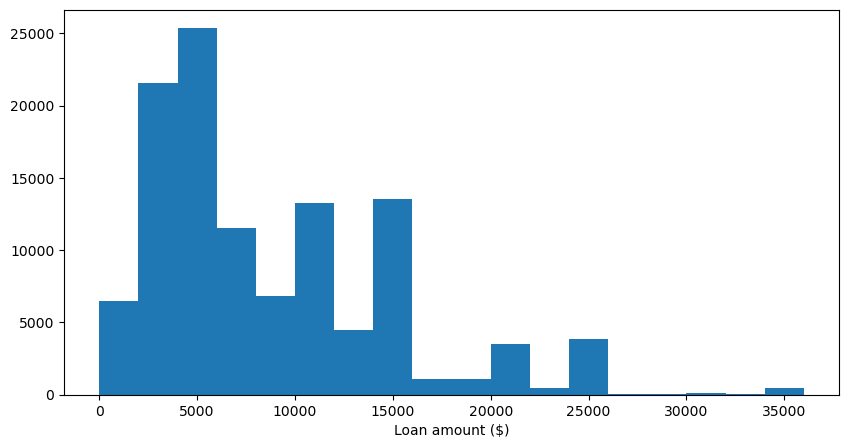

In [10]:
bins = np.arange(0, df2['LoanOriginalAmount'].max()+2000,2000)
plt.figure(figsize=[10, 5])
plt.xlabel('Loan amount ($)')
plt.hist(data = df2, x = 'LoanOriginalAmount', bins = bins);

The distribution looks skewed to the right with a peak around 5000$.

Next, let's investigate the monthly income distribution

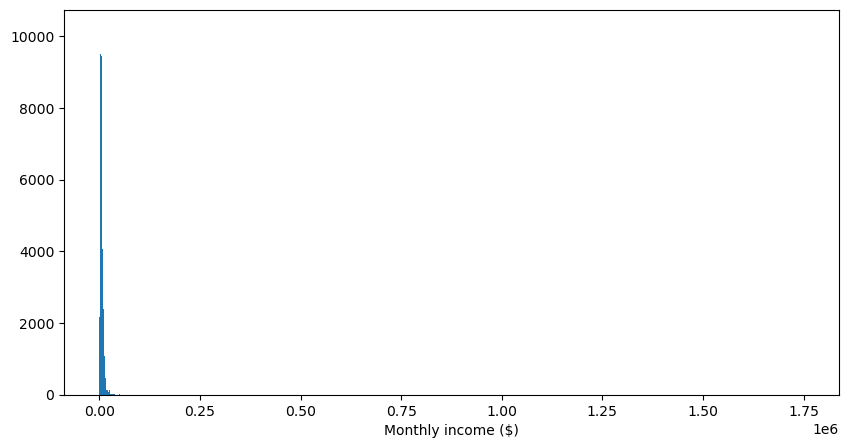

In [11]:
bins = np.arange(0, df2['StatedMonthlyIncome'].max()+500,500)
plt.figure(figsize=[10, 5])
plt.xlabel('Monthly income ($)')
plt.hist(data = df2, x = 'StatedMonthlyIncome', bins = bins);

The distribution is not clear due to the existence of outliers, so let's get rid of them.

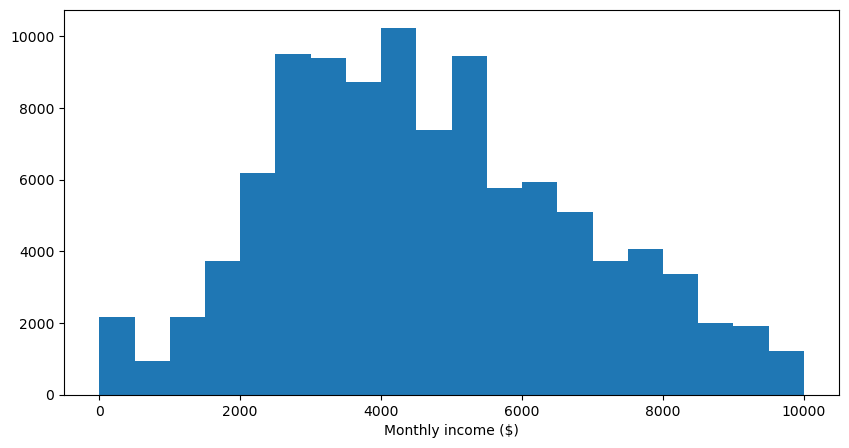

In [12]:
stMonth_no_outliers = df2[df2['StatedMonthlyIncome']<10000]
bins = np.arange(0, stMonth_no_outliers['StatedMonthlyIncome'].max()+500,500)
plt.figure(figsize=[10, 5])
plt.xlabel('Monthly income ($)')
plt.hist(data = stMonth_no_outliers, x = 'StatedMonthlyIncome', bins = bins);

Now we can see that the distribution is slightly skewed to the right with a peak around 4300$.

Then, let's investigate the distribution of the number of investors.

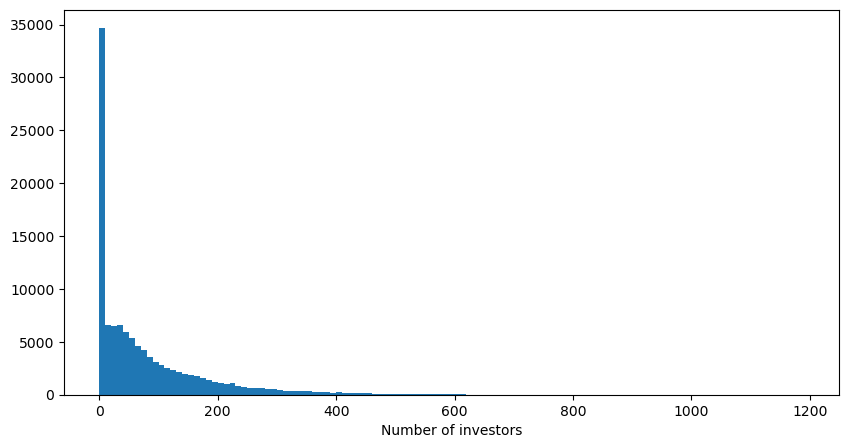

In [13]:
bins = np.arange(0, df2['Investors'].max()+10,10)
plt.figure(figsize=[10, 5])
plt.xlabel('Number of investors')
plt.hist(data = df2, x = 'Investors', bins = bins);

we can see that the distribution has a long tail at the first few values. For better visualization of the distribution let's use log scaled x-axis.

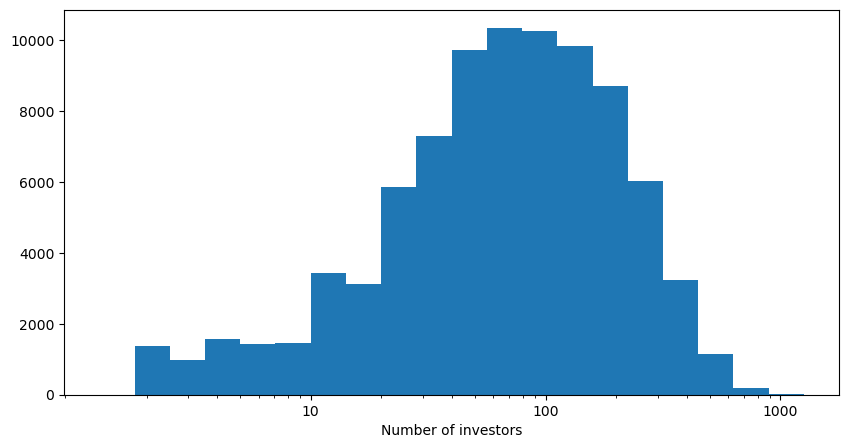

In [14]:
xticks = [10, 100,1000]
labels = ['{}'.format(v) for v in xticks]
bins = 10 ** np.arange(0.1, np.log10(df2['Investors'].max())+0.15, 0.15)
plt.figure(figsize=[10, 5])
plt.xlabel('Number of investors')
plt.hist(data = df2, x = 'Investors', bins = bins);
plt.xscale('log')
plt.xticks(xticks, labels);


the log scaled version of the number of investors has a left skewed distribution with a peak around 100.

Finally, let's investigate the Income range column.

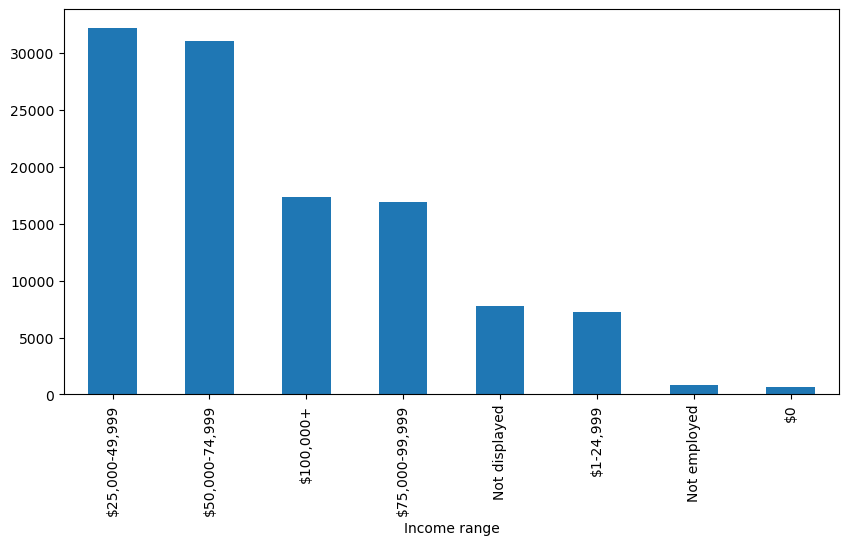

In [15]:
plt.xlabel('Income range')
df2.IncomeRange.value_counts().plot(kind='bar',figsize=(10,5));

We can see that most of the borrowers income is in the range of (25,000\\$-50,000\\$).

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The loan amount distribution is right skewed with a peak around 5000$. the number of investors log scaled distribution is slightly left skewed with a peak around 100. The most common income range is around (25,000 −50,000\\$).

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The number of investors distribution has a long tail at the first few values so i used a log scaled distribution. the monthly income had some outliers so i had to remove them then plot the distribution.

## Bivariate Exploration

Let's have a look at the correlation between the numerical variables that we are intersted in.

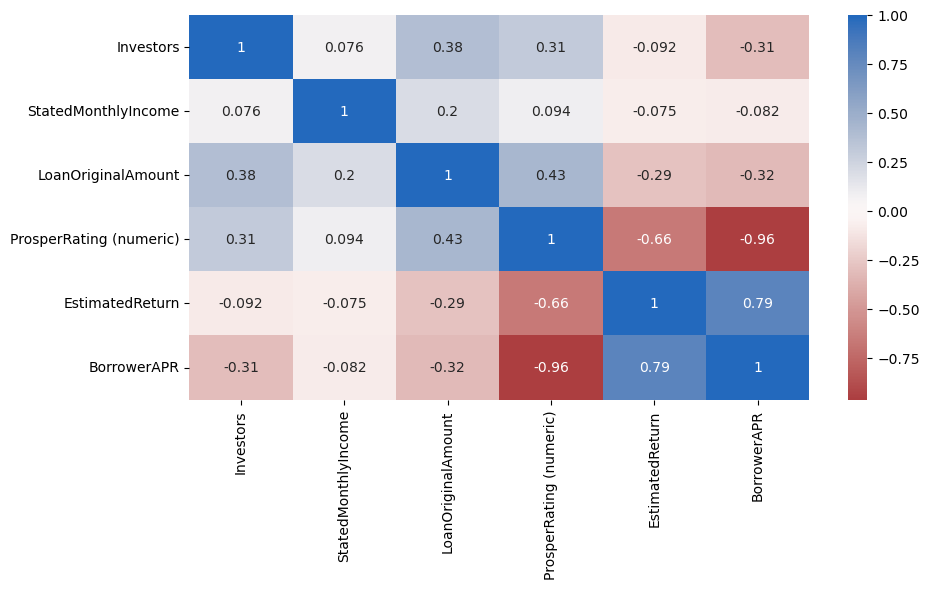

In [16]:
plt.figure(figsize = [10, 5]);
sb.heatmap(df2[["Investors","StatedMonthlyIncome","LoanOriginalAmount","ProsperRating (numeric)","EstimatedReturn","BorrowerAPR"]].corr(), annot = True,cmap = 'vlag_r', center = 0);

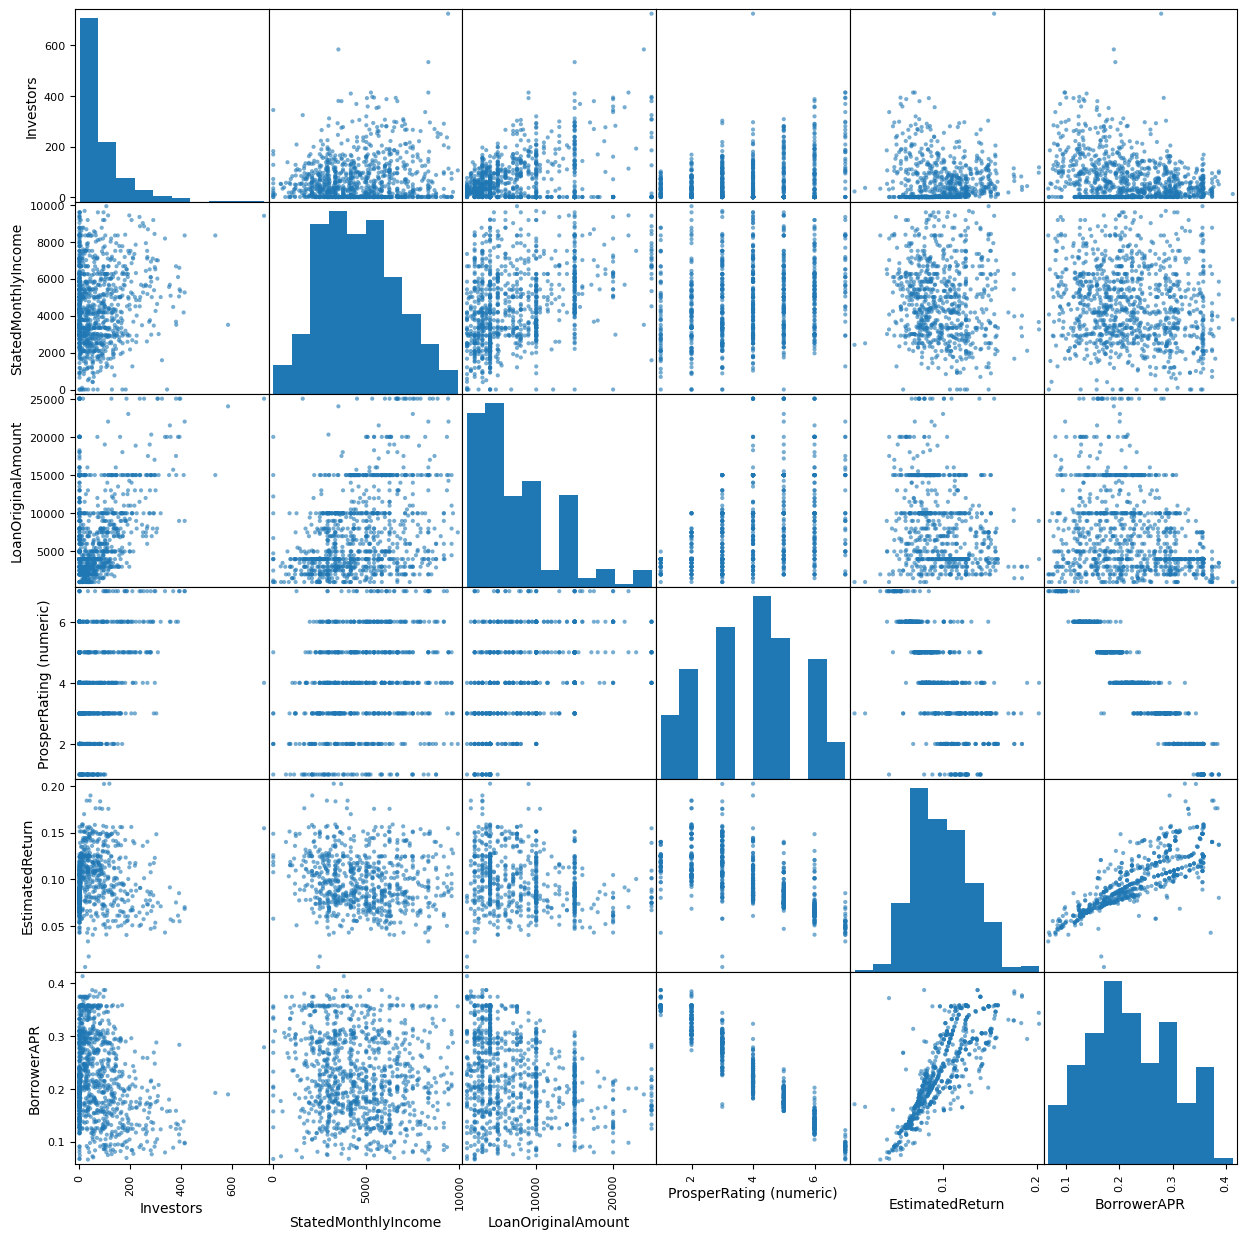

In [17]:
pd.plotting.scatter_matrix(stMonth_no_outliers[["Investors","StatedMonthlyIncome","LoanOriginalAmount","ProsperRating (numeric)","EstimatedReturn","BorrowerAPR"]].sample(n=1000),figsize = [15, 15],alpha=0.6);

We can see from the graphs that a positive correlation exists between the Borrower APR and the Estimated return and a high negative correlation between the Borrower APR and Prosper rating.

Let's have a closer look at these highly correlated features.

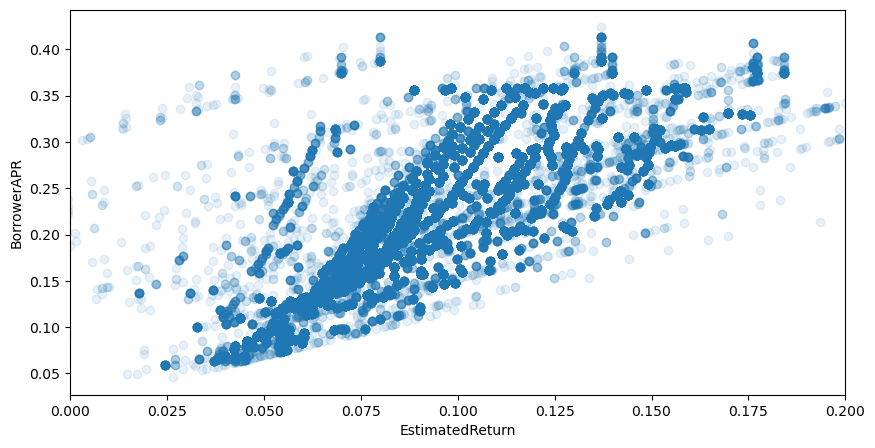

In [18]:
plt.figure(figsize = [10, 5]);
plt.scatter(data = df2, x = 'EstimatedReturn', y = 'BorrowerAPR', alpha = 1/10)
plt.xlim([0, 0.2]);
plt.xlabel('EstimatedReturn');
plt.ylabel('BorrowerAPR');

We can see that the relationship between the EstimatedReturn and BorrowerAPR is close to a linear relation.

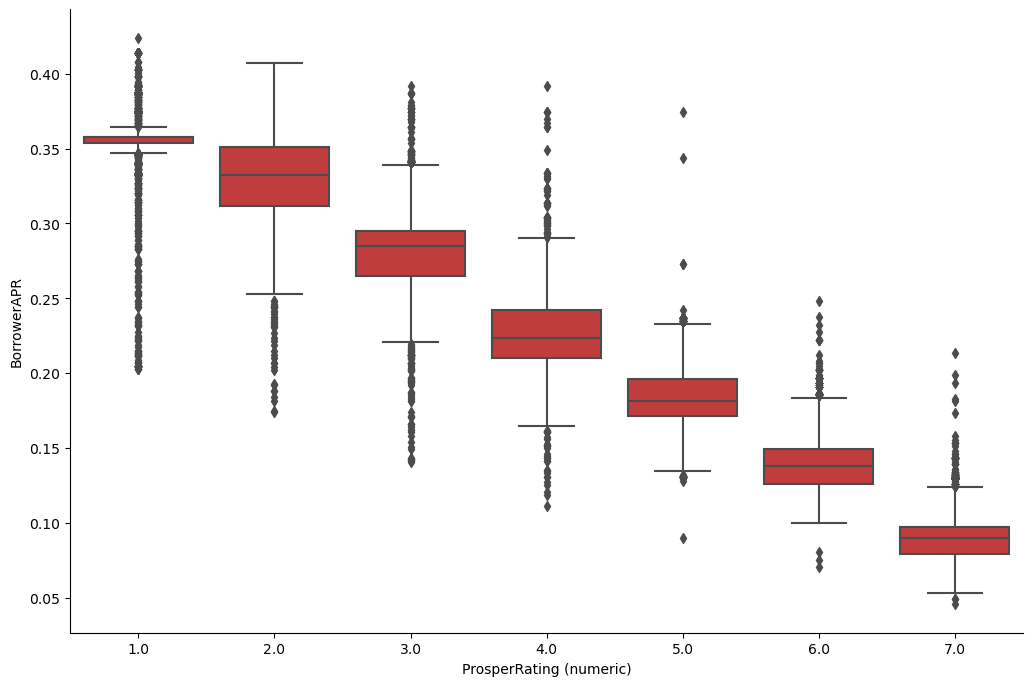

In [19]:
def boxgrid(x, y, **kwargs):
    sb.boxplot(x=x, y=y, color = sb.color_palette()[3]);
    
g = sb.PairGrid(data = df2, y_vars = 'BorrowerAPR', x_vars = 'ProsperRating (numeric)',
                height = 7, aspect = 1.5)
g.map(boxgrid);

We can see the strong negative correlation between the BorrowerAPR and ProsperRating. 

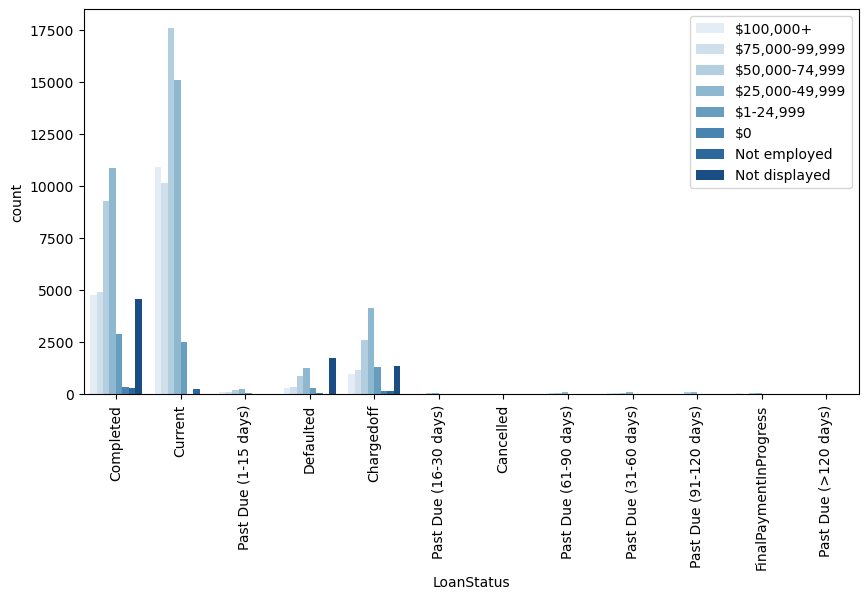

In [20]:
plt.figure(figsize = [10, 5]);
plt.xticks(rotation=90);
sb.countplot(data = df2, x = 'LoanStatus', hue = 'IncomeRange', palette = 'Blues',hue_order=["$100,000+","$75,000-99,999","$50,000-74,999","$25,000-49,999","$1-24,999","$0","Not employed","Not displayed"]);
plt.legend(loc = 1);

The last 7 values of Loanstatus column doesn't give us much information as there are very few samples within these values, so it's better to remove them from the plot.

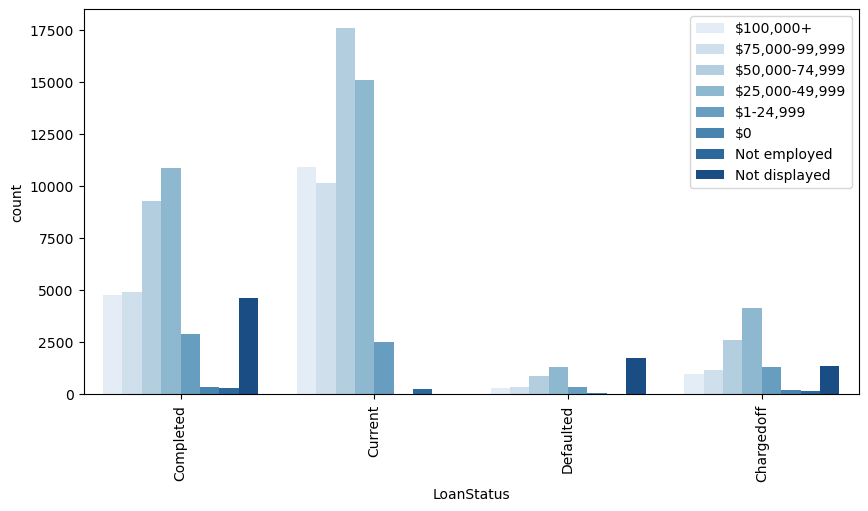

In [21]:
df3 = df2[df2.LoanStatus.isin(["Completed","Current","Defaulted","Chargedoff"])]
plt.figure(figsize = [10, 5]);
plt.xticks(rotation=90);
sb.countplot(data = df3, x = 'LoanStatus', hue = 'IncomeRange', palette = 'Blues',hue_order=["$100,000+","$75,000-99,999","$50,000-74,999","$25,000-49,999","$1-24,999","$0","Not employed","Not displayed"]);
plt.legend(loc = 1);

We can notice a less 0$ income ratio in Current loans relative to other loan status.

Now, Let's investigate relation between loan status and prosper rating.

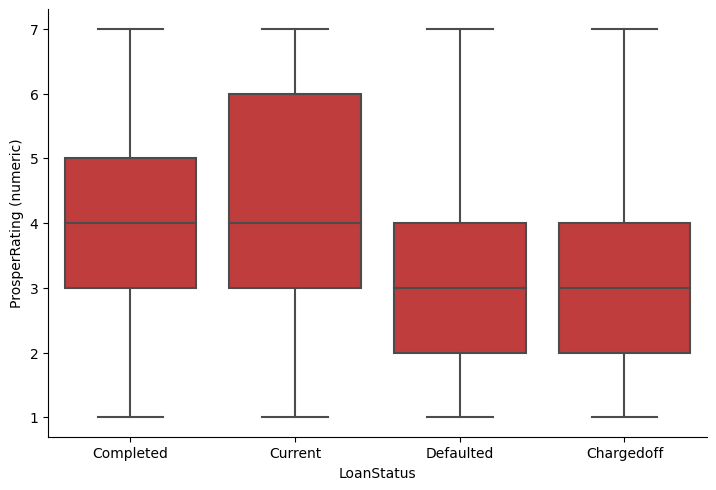

In [22]:
g = sb.PairGrid(data = df3, y_vars = 'ProsperRating (numeric)', x_vars = 'LoanStatus',
                height = 5, aspect = 1.5)
g.map(boxgrid);

We, notice that defaulted and charged off loans have a relative prosper rating.

Now let's investigate the relationship between Loan amount and income range.

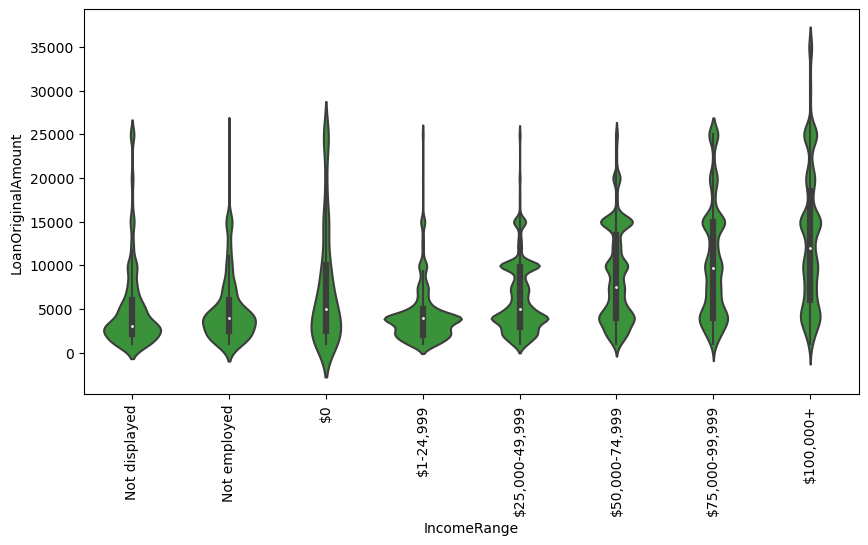

In [23]:
desired_order = ['Not displayed','Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
plt.figure(figsize = [10, 5]);
plt.xticks(rotation=90);
sb.violinplot(data = df2, x = 'IncomeRange', y = 'LoanOriginalAmount',
               color=sb.color_palette()[2],order = desired_order);

From the plot we notice that people with an income range above 50,000\\$ tend more to have loans around 15,000\\$ than other income ranges. We notice  that a long tail exists in the 100,000\\$+ income range which means that these include the highest loan amounts . We also see that people with income range (1-25,000\\$) have the highes amount of loans below 5000\\$.


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

I noticed from the violin plot that borrowers with an income range higher than 50,000\\$ have more loans around 15,000\\$ or above. I also noticed that borrowers with  an income range 100,000\\$+ have high loan values higher than 25,000\\$.I also noticed that borrowers with  an income range (1-25,000\\$) have the highes amount of loans below 5000\\$.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I investigated the negative correlation that appeared in the heatmap and the scatter matrix with a boxplot. I also investigated the loanstatus effect on income ranges of borrowers.


## Multivariate Exploration

First let's  investigate the effect of loan status on investors, monthly income and loan amount distribution.

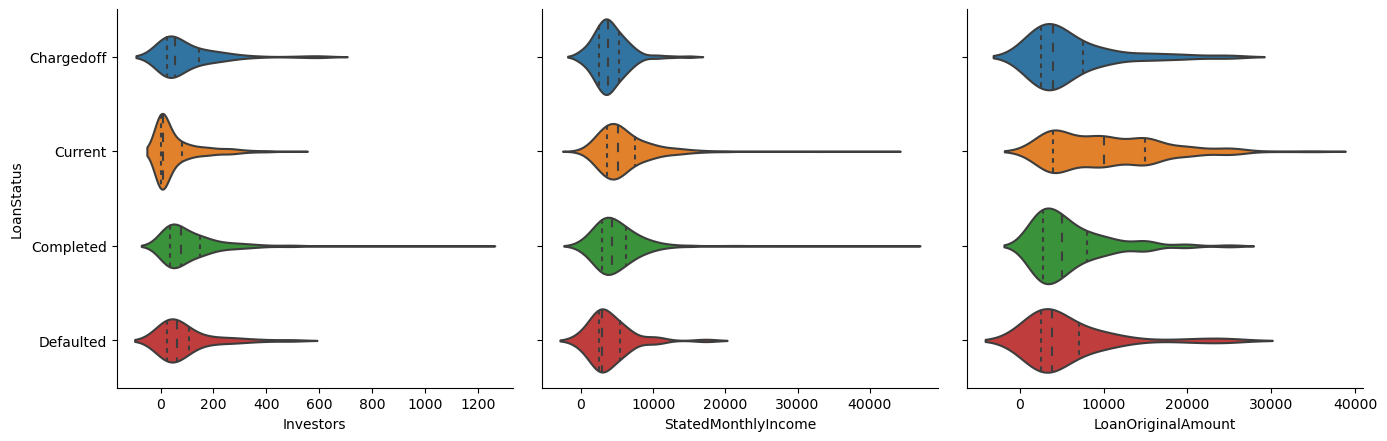

In [24]:
g = sb.PairGrid(data = df3.sample(n=1000), x_vars = ['Investors', 'StatedMonthlyIncome', 'LoanOriginalAmount'],
                y_vars = ['LoanStatus'],height = 4.5, aspect = 1);
g.map(sb.violinplot, inner = 'quartile');

The current loans have relatively less number of investors more monthly income and more loan amount.

Next, let's investigate the relation between term duration , loan amount and income range.

In [25]:
df.IncomeRange.unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not employed', '$0'], dtype=object)

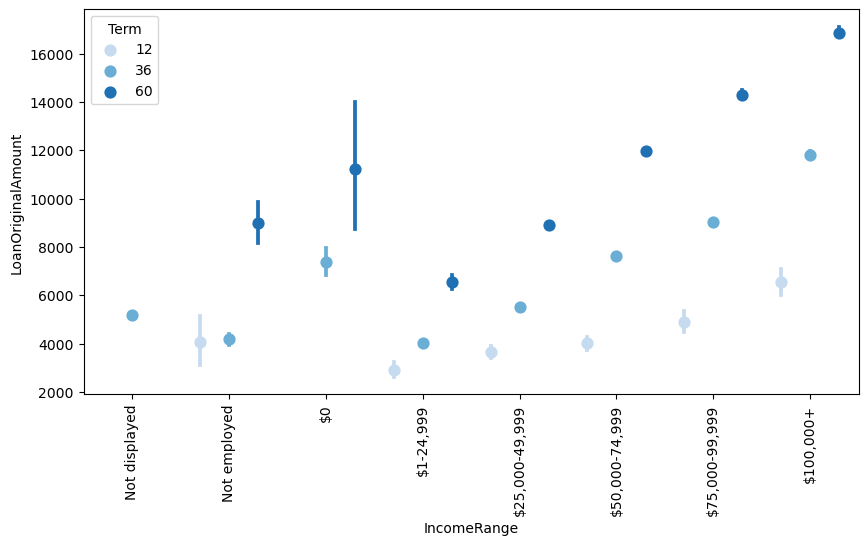

In [26]:
desired_order = ['Not displayed','Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
plt.figure(figsize = [10, 5]);
sb.pointplot(data = df3, x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge =0.6, order=desired_order);
plt.xticks(rotation=90);

We can see that high loan amount values have long term duration. we also notice that the 100,000\\$+ income range have the longest term duration at the highest loan amount.

Finally, let's investigate the relation between term duration , number of investors and income range.

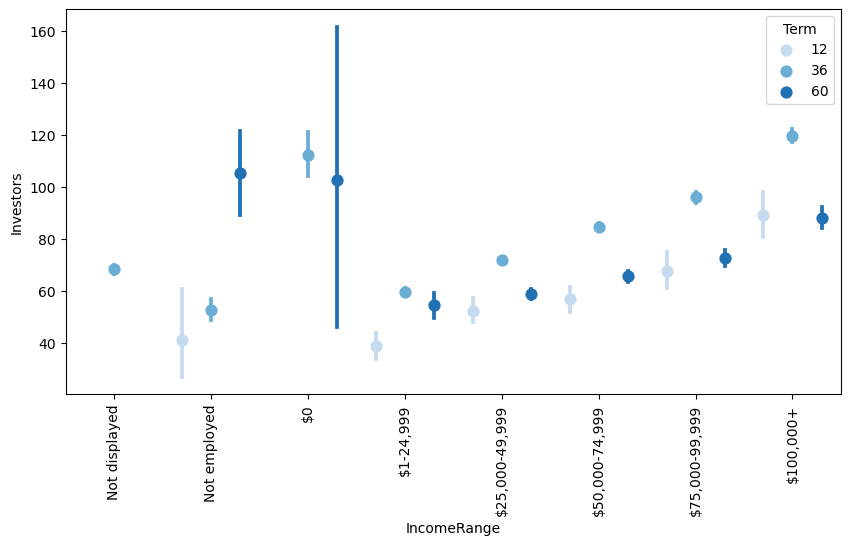

In [27]:
plt.figure(figsize = [10, 5]);
sb.pointplot(data = df3, x = 'IncomeRange', y = 'Investors', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge =0.6, order=desired_order);
plt.xticks(rotation=90);

We can notice from the graph that a medium number of investors for each income range has the longest term ratio while at maximum number of investors we have a medium term duration.

Now let's investigate realtions with loan status.

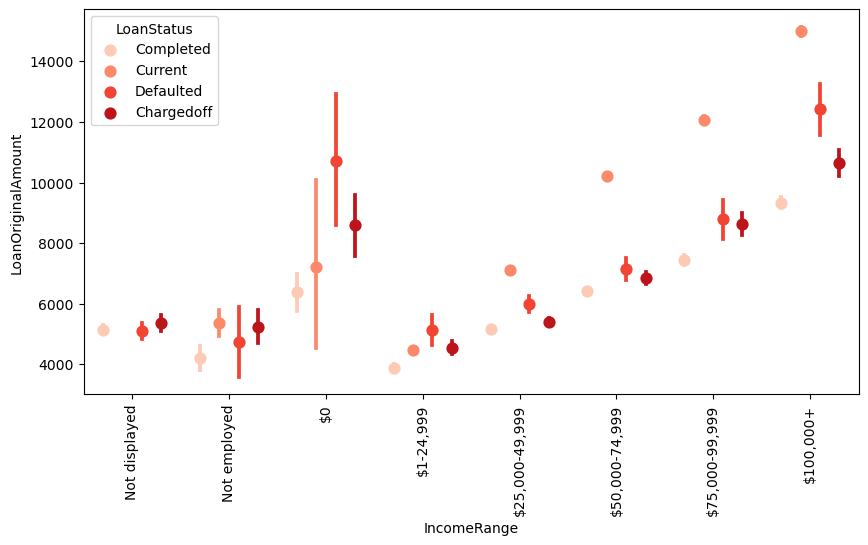

In [28]:
plt.figure(figsize = [10, 5]);
sb.pointplot(data = df3, x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'LoanStatus',
           palette = 'Reds', linestyles = '', dodge =0.6, order=desired_order);
plt.xticks(rotation=90);

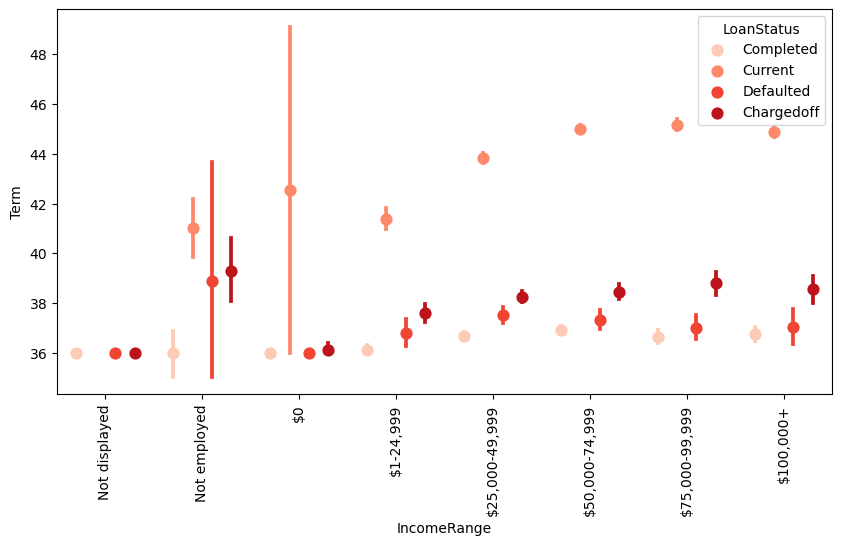

In [29]:
plt.figure(figsize = [10, 5]);
sb.pointplot(data = df3, x = 'IncomeRange', y = 'Term', hue = 'LoanStatus',
           palette = 'Reds', linestyles = '', dodge =0.6, order=desired_order);
plt.xticks(rotation=90);

Using the charts, It's possible to relate risky loans with (income range, term and loan amount). 
* These are located in middle term ranges for most income ranges.
* These are located in middle loan amount for income ranges higher than 25,000 \\$ .

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

From the violin charts we notice that the current loans have relatively less number of investors more monthly income and more loan amount. This supports and generalizes the relation we got from the bar charts where we noticed that current loans have a less 0\\$ income ratio. We can also see that high loan amount values have long term duration from the point plot.

### Were there any interesting or surprising interactions between features?

Surprisingly, we notice that a medium number of investors is associated with having a long term duration while a large number of investors is associated with having a medium term duration.